In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import tensorflow as tf 
from tensorflow import keras

# print version of packages
for model in mpl,np,pd,tf,keras:
    print(model.__name__, model.__version__)

matplotlib 3.5.3
numpy 1.23.2
pandas 1.4.4
tensorflow 2.9.1
keras.api._v2.keras 2.9.0


In [2]:
#load fashion_mnist dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all),(x_test, y_test) = fashion_mnist.load_data()

# divide validation dataset
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

# print shape of dataset
print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)
print(x_test.shape,y_test.shape)

(55000, 28, 28) (55000,)
(5000, 28, 28) (5000,)
(10000, 28, 28) (10000,)


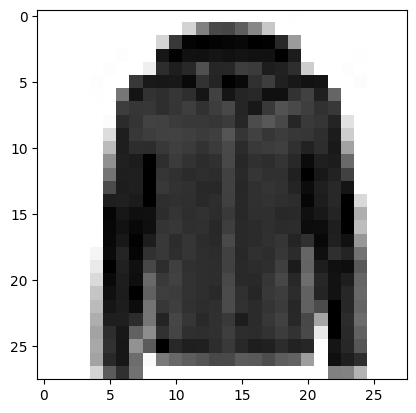

In [3]:
def show_single_image(img):
    plt.imshow(img, cmap="binary")
    plt.show()
    
show_single_image(x_train[0])  

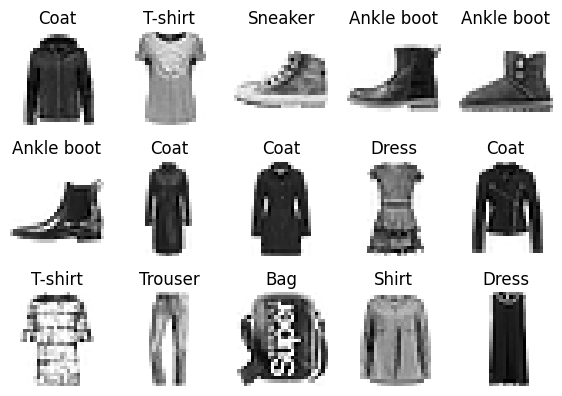

In [4]:
def show_images(n_rows, n_cols, x_data ,y_data, class_name):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(x_data[index], cmap="binary",interpolation = "nearest")
            plt.axis("off")
            plt.title(class_name[y_data[index]])
            
    plt.show()
    
class_names= ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
show_images(3,5,x_train,y_train,class_names)          

In [5]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    
])
model.compile(loss='sparse_categorical_crossentropy',
             optimizer = 'sgd',
             metrics = ['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(x_train,y_train,epochs=10,
         validation_data = (x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 18s 6ms/step - loss: nan - accuracy: 0.1008 - val_loss: nan - val_accuracy: 0.0914
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: nan - accuracy: 0.1008 - val_loss: nan - val_accuracy: 0.0914
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: nan - accuracy: 0.1008 - val_loss: nan - val_accuracy: 0.0914
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: nan - accuracy: 0.1008 - val_loss: nan - val_accuracy: 0.0914
Epoch 5/10
1719/1719 [==============================] - 12s 7ms/step - loss: nan - accuracy: 0.1008 - val_loss: nan - val_accuracy: 0.0914
Epoch 6/10
1719/1719 [==============================] - 12s 7ms/step - loss: nan - accuracy: 0.1008 - val_loss: nan - val_accuracy: 0.0914
Epoch 7/10
1719/1719 [==============================] - 12s 7ms/step - loss: nan - accuracy: 0.1008 - val_loss: nan - val_accuracy: 0.0914
Epoch 8/10
1719/1719 [=====

In [8]:
print(history.history)

{'loss': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], 'accuracy': [0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372], 'val_loss': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], 'val_accuracy': [0.09139999747276306, 0.09139999747276306, 0.09139999747276306, 0.09139999747276306, 0.09139999747276306, 0.09139999747276306, 0.09139999747276306, 0.09139999747276306, 0.09139999747276306, 0.09139999747276306]}


In [9]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.1000


[nan, 0.10000000149011612]

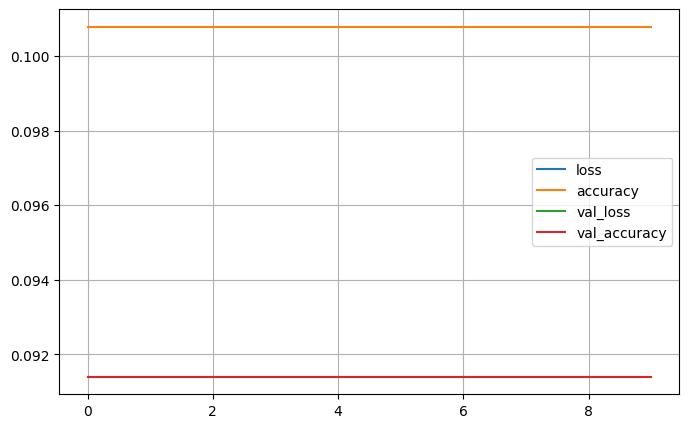

In [10]:
# visualize the training process
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid()
    #plt.gca().set_ylim(0,1)
    plt.show()
    
plot_learning_curves(history)